In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import yfinance as yf
import numpy as np

In [21]:
# MACD parameters
short_period = 12
long_period  = 26
signal_period = 9
SYM = 'AAPL'

In [22]:
#Collect daily quote (only close value) using yFinance API for last 1yr
df = yf.Ticker('AAPL').history(period='1y')[['Close']]

In [23]:

# Subtract the 26 day EMA from the 12-Day EMA to get the MACD
df['macd'] = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean() -df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
df

,Close,macd
Date,,
2021-12-20 00:00:00-05:00,168.770493,NaN
2021-12-21 00:00:00-05:00,171.991791,NaN
2021-12-22 00:00:00-05:00,174.626495,NaN
2021-12-23 00:00:00-05:00,175.262802,NaN
2021-12-27 00:00:00-05:00,179.289459,NaN
...,...,...
2022-12-13 00:00:00-05:00,145.470001,-0.781396
2022-12-14 00:00:00-05:00,143.210007,-0.850394
2022-12-15 00:00:00-05:00,136.500000,-1.430032


In [24]:
# signal = 9 Day EMA of the MACD 
df['macd_s'] = df['macd'].ewm(span=9, adjust=False, min_periods=9).mean()
df

,Close,macd,macd_s
Date,,,
2021-12-20 00:00:00-05:00,168.770493,NaN,NaN
2021-12-21 00:00:00-05:00,171.991791,NaN,NaN
2021-12-22 00:00:00-05:00,174.626495,NaN,NaN
2021-12-23 00:00:00-05:00,175.262802,NaN,NaN
2021-12-27 00:00:00-05:00,179.289459,NaN,NaN
...,...,...,...
2022-12-13 00:00:00-05:00,145.470001,-0.781396,-0.491648
2022-12-14 00:00:00-05:00,143.210007,-0.850394,-0.563397
2022-12-15 00:00:00-05:00,136.500000,-1.430032,-0.736724


In [25]:
# Histogram MACD- signal.
df['hist'] = df['macd']-df['macd_s']
#replace Nan with 0
df.fillna(0,inplace=True) 
df

,Close,macd,macd_s,hist
Date,,,,
2021-12-20 00:00:00-05:00,168.770493,0.000000,0.000000,0.000000
2021-12-21 00:00:00-05:00,171.991791,0.000000,0.000000,0.000000
2021-12-22 00:00:00-05:00,174.626495,0.000000,0.000000,0.000000
2021-12-23 00:00:00-05:00,175.262802,0.000000,0.000000,0.000000
2021-12-27 00:00:00-05:00,179.289459,0.000000,0.000000,0.000000
...,...,...,...,...
2022-12-13 00:00:00-05:00,145.470001,-0.781396,-0.491648,-0.289748
2022-12-14 00:00:00-05:00,143.210007,-0.850394,-0.563397,-0.286996
2022-12-15 00:00:00-05:00,136.500000,-1.430032,-0.736724,-0.693308


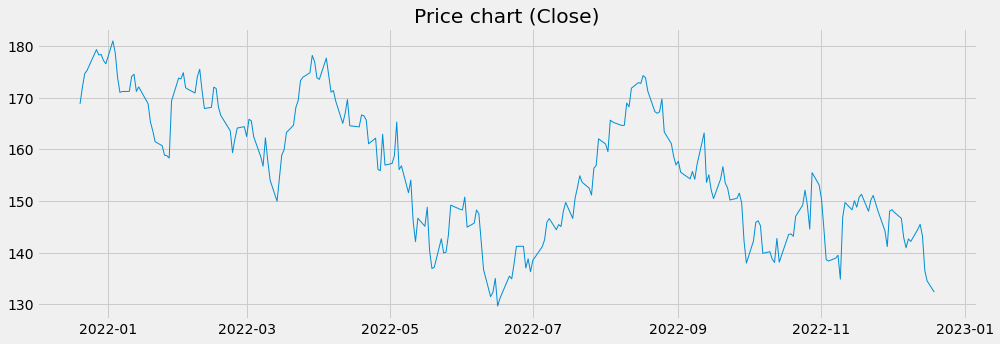

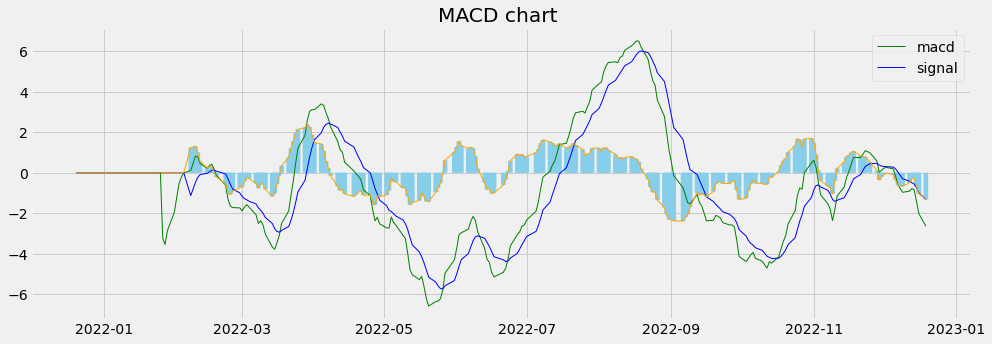

In [26]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =(20,10)

# plot close price
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], label="close", linewidth=1)
plt.title('Price chart (Close)')
plt.show()

#plot macd, signal and histogram

plt.figure(figsize=(15,5))
plt.title('MACD chart ')
plt.plot(df.index, df['macd'],label="macd", color='green', linewidth=1)
plt.plot(df.index, df['macd_s'], label="signal", color='blue', linewidth=1)
plt.plot(df.index, df['hist'], color='orange', linewidth=1)
plt.bar(df.index, df['hist'], width=2, snap=False, color='skyblue')
plt.legend()
plt.show()


In [29]:
def MACD(data, short_window, long_window):

  # Initialize the `signals` DataFrame with the `signal` column
  # signals = pd.DataFrame(index=data.index)

  df['signal'] = 0.0

  # Create short simple moving average over the short window
  df['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

  # Create long simple moving average over the long window
  df['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

  # Create signals
  df['signal'][short_window:] = np.where(df['short_mavg'][short_window:] 
                                            > df['long_mavg'][short_window:], 1.0, 0.0)   

  # Generate trading orders
  df['positions'] = df['signal'].diff()

  return df

In [30]:
MACD(df, 12,26)

,Close,macd,macd_s,hist,signal,short_mavg,long_mavg,positions
Date,,,,,,,,
2021-12-20 00:00:00-05:00,168.770493,0.000000,0.000000,0.000000,0.0,168.770493,168.770493,NaN
2021-12-21 00:00:00-05:00,171.991791,0.000000,0.000000,0.000000,0.0,170.381142,170.381142,0.0
2021-12-22 00:00:00-05:00,174.626495,0.000000,0.000000,0.000000,0.0,171.796260,171.796260,0.0
2021-12-23 00:00:00-05:00,175.262802,0.000000,0.000000,0.000000,0.0,172.662895,172.662895,0.0
2021-12-27 00:00:00-05:00,179.289459,0.000000,0.000000,0.000000,0.0,173.988208,173.988208,0.0
...,...,...,...,...,...,...,...,...
2022-12-13 00:00:00-05:00,145.470001,-0.781396,-0.491648,-0.289748,0.0,144.565834,145.813076,0.0
2022-12-14 00:00:00-05:00,143.210007,-0.850394,-0.563397,-0.286996,0.0,144.481668,145.978076,0.0
2022-12-15 00:00:00-05:00,136.500000,-1.430032,-0.736724,-0.693308,0.0,144.092501,145.862691,0.0


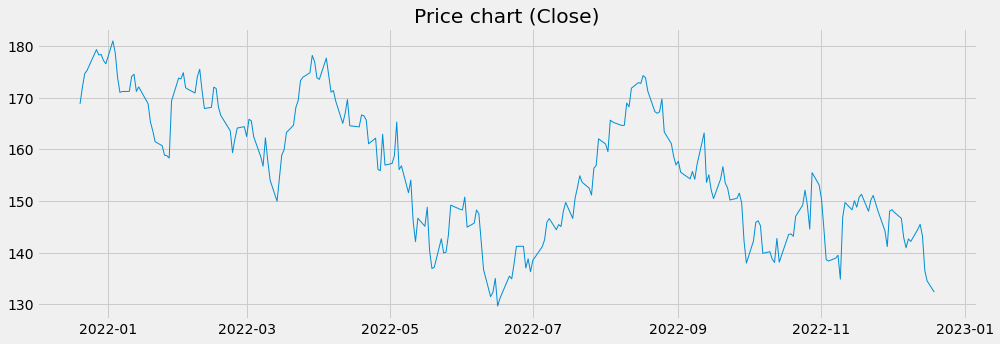

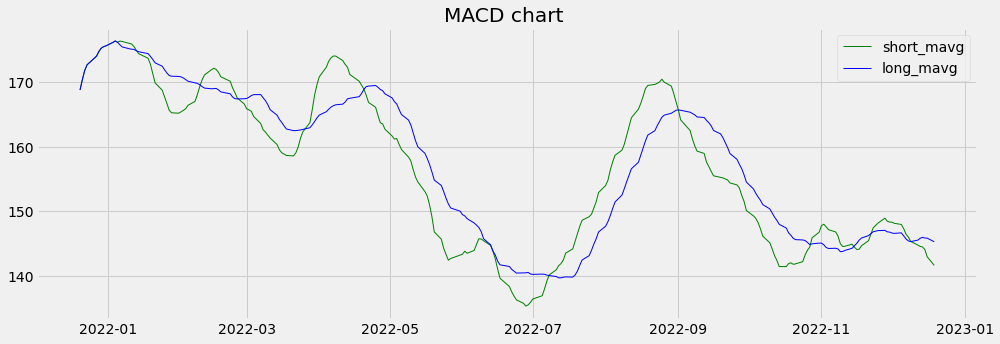

In [35]:
plt1.style.use('fivethirtyeight')
plt1.rcParams['figure.figsize'] =(20,10)

# plot close price
plt1.figure(figsize=(15,5))
plt1.plot(df.index, df['Close'], label="close", linewidth=1)
plt1.title('Price chart (Close)')
plt1.show()

#plot macd, signal and histogram

plt1.figure(figsize=(15,5))
plt1.title('MACD chart ')
plt1.plot(df.index, df['short_mavg'],label="short_mavg", color='green', linewidth=1)
plt1.plot(df.index, df['long_mavg'], label="long_mavg", color='blue', linewidth=1)

plt1.legend()
plt1.show()